In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')


  # Lets load the data
  Okay, we got our libraries loaded, now it is time to use pandas to read
  the train.csv file that is located in the data folder.

  Pandas read_csv command is able to read and parse csv files into dataframes,
  you can see the dataframe as a matrix on steroids.

  ## Data Dictionary


  | Variable | Definition | Key |
  | :-: | :-: | :-: |
  | survival | Survival | 0 = No, 1 = Yes|
  | pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd|
  | sex | Sex | |
  | Age | Age in years | |
  | sibsp | # of siblings / spouses aboard the Titanic | |
  | parch | # of parents / children aboard the Titanic | |
  | ticket | Ticket number | |
  | fare | Passenger fare | |
  | cabin | Cabin number | |
  | embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

In [2]:
dataset = pd.read_csv('data/train.csv')
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


  # Some Terminology
  In our *dataset* we distinguish between the variables that gives us information that we are going to use
  in the estimation and we call them *features*, the variable we are trying to estimate is called target.

  In formal machine learning books, you will often see the dataset expressed as a set $D$ composed of
  $n$ tuples $(\textbf{x},y)$ where $\textbf{x}$ is the feature vector (or predictors) and y is the target variable.

  In this specific problem, **Survived** is the attribute that is our *target* value, all the other attributes from the
  dataset are *features*. However we don't need (and in this case we should not) use all the avaliable attributes as features for
  our model.

In [3]:
dataset.drop(labels=['Name', 'Ticket'],
             axis=1,
             inplace=True)
dataset.head()



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [4]:
# Separate the data into two subsets to see if there is some difference in distr
# from survived to non survived

survivedSubset = dataset[dataset['Survived'] == 1]
notSurvivedSubset = dataset[dataset['Survived'] == 0]

totalSurvived = len(survivedSubset)
totalNotSurvived = len(notSurvivedSubset)

print(
    f'Total Survived: {totalSurvived}\nTotal Not Survived: {totalNotSurvived}')
print(f'Ratio NS/S: {totalNotSurvived / totalSurvived :.2f}')



Total Survived: 342
Total Not Survived: 549
Ratio NS/S: 1.61


In [5]:
for column in dataset.columns.values:
    hasMissingValues = dataset[column].isnull().values.any()
    if hasMissingValues:
        print(f'Column: {column} has missing values')


Column: Age has missing values
Column: Cabin has missing values
Column: Embarked has missing values


 # Some helper functions
 Lets define two auxiliary functions to help us plot some pie charts
 to see how are the how many observations on the dataset are categorized according to
 the attributes ** Sex ** and **Embarked** as well as the ** Survived ** target.

In [6]:


def drawPieChart(labels,
                 count,
                 title=' '):

    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    _, ax1 = plt.subplots()
    ax1.set_title(title)
    explode = [0.1 for i in labels]
    ax1.pie(count, labels=labels,
            autopct=lambda perc: f'{perc:.2f}% ({int(perc * sum(count)/100)})',
            shadow=True, explode=explode,
            pctdistance=0.7, startangle=90)
    # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.axis('equal')

    plt.show()


def getFrequenciesInCategoricalColumn(dataframe, columnName):
    labels = dataframe[columnName].unique()
    # print(f'Antes: {labels}, {list(map(lambda x: x is np.nan,labels))}')
    labels = sorted(labels, key=lambda x: '0' if x is np.nan else x)
    # print(labels)

    def sumatoryFunction(columnContent):
        if columnContent is np.nan:
            return sum(dataframe[columnName].isnull())
        return sum(dataframe[columnName] == columnContent)

    count = list(map(sumatoryFunction,
                     labels))
    return labels, count



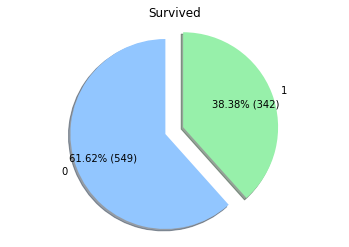

In [7]:
columnName = 'Survived'
labels, count = getFrequenciesInCategoricalColumn(dataset, columnName)
drawPieChart(labels, count, columnName)



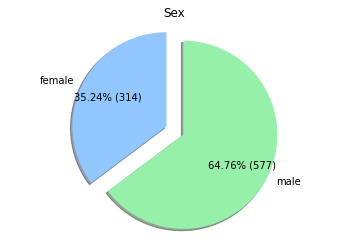

In [8]:
columnName = 'Sex'
labels, count = getFrequenciesInCategoricalColumn(dataset, columnName)
drawPieChart(labels, count, columnName)



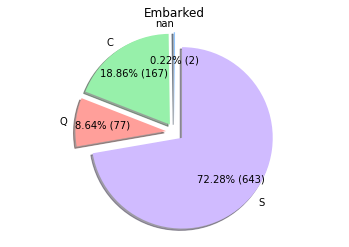

In [9]:
columnName = 'Embarked'
labels, count = getFrequenciesInCategoricalColumn(dataset, columnName)
drawPieChart(labels, count, columnName)



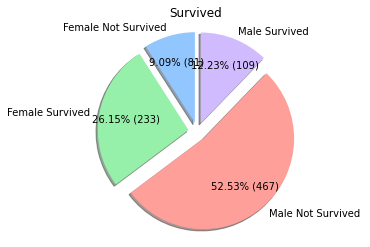

In [10]:
columnName = 'Survived'
datasetFemale = dataset[dataset['Sex'] == 'female']
datasetMale = dataset[dataset['Sex'] == 'male']

labelsFemale, countFemale = getFrequenciesInCategoricalColumn(
    datasetFemale, columnName)
labelsFemale = list(
    map(lambda x: 'Female Survived' if x else 'Female Not Survived', labelsFemale))

labelsMale, countMale = getFrequenciesInCategoricalColumn(
    datasetMale, columnName)
labelsMale = list(
    map(lambda x: 'Male Survived' if x else 'Male Not Survived', labelsMale))

drawPieChart(list(labelsFemale) + list(labelsMale),
             countFemale + countMale, columnName)



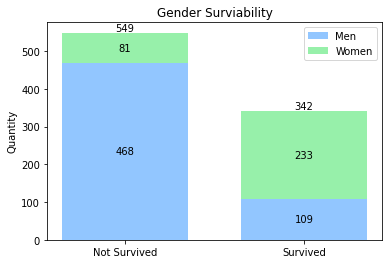

In [11]:
# Does the gender influences on surviability?

fig, ax = plt.subplots()

width = 0.7
ind = np.arange(2)    # the x locations for the groups

p1 = ax.bar(ind, countMale, width, label='Men')
p2 = ax.bar(ind, countFemale, width,
            bottom=countMale, label='Women')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Quantity')
ax.set_title('Gender Surviability')
ax.set_xticks(ind)
ax.set_xticklabels(('Not Survived', 'Survived'))
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)

plt.show()



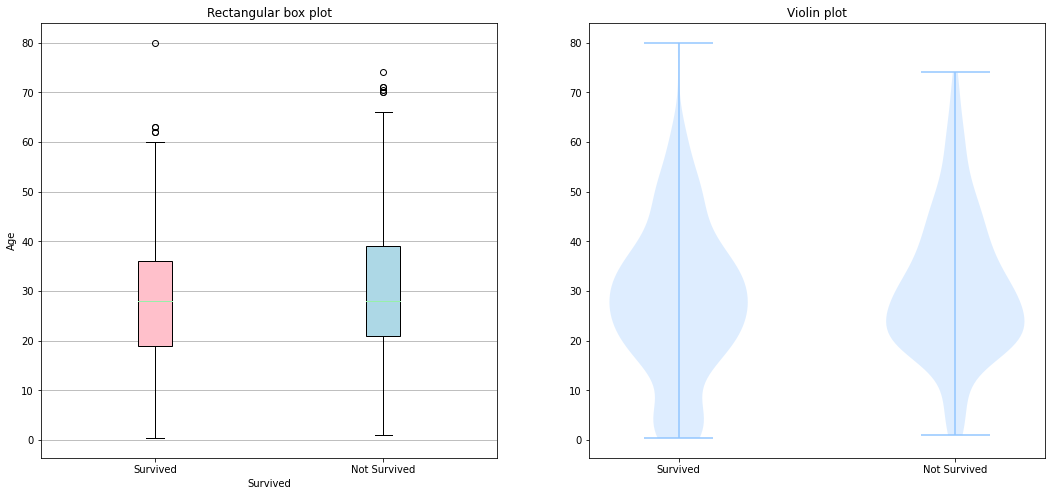

In [12]:
# Lets see the distributions between survived and not survived
# we will use both boxplot and violin plot to see the pros and cons
# in each of them.
# TLDR: Violin shows the distr whereas boxplot only shows quartiles.

labels = ['Survived', 'Not Survived']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# rectangular box plot
bplot1 = ax1.boxplot([survivedSubset['Age'].dropna(axis=0).values,
                      notSurvivedSubset['Age'].dropna(axis=0).values],
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

bplot2 = ax2.violinplot([survivedSubset['Age'].dropna(axis=0).values,
                         notSurvivedSubset['Age'].dropna(axis=0).values])
ax2.set_title('Violin plot')

ax2.set_xticks([1, 2])
ax2.set_xticklabels(labels)

# fill with colors
colors = ['pink', 'lightblue']

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines

ax1.yaxis.grid(True)
ax1.set_xlabel('Survived')
ax1.set_ylabel('Age')

plt.show()



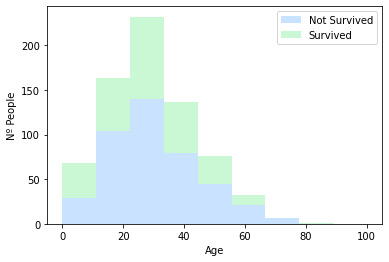

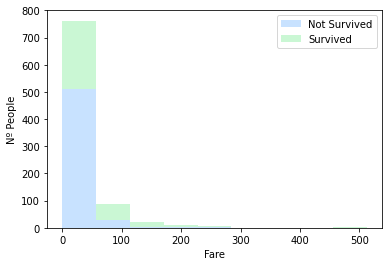

In [13]:
# Lets look at some histograms to see if something  appears looking at the fare

bins = np.linspace(0, 100, 10)

# plt.hist(survivedSubset['Age'].dropna(axis=0).values,
#          bins, alpha=0.5, label='Survived')
plt.hist([notSurvivedSubset['Age'].dropna(axis=0).values,
          survivedSubset['Age'].dropna(axis=0).values],
         bins,
         alpha=0.5,
         histtype='barstacked',
         stacked=True,
         label=['Not Survived', 'Survived'])
plt.legend(loc='upper right')
plt.ylabel('Nº People')
plt.xlabel('Age')
plt.show()

histogramMin = min(dataset['Fare'].values)
histogramMax = max(dataset['Fare'].values)

bins = np.linspace(histogramMin, histogramMax, 10)
# plt.hist(survivedSubset['Fare'].dropna(axis=0).values,
#          bins, alpha=0.5, label='Survived',
#          histtype='barstacked')
plt.hist([notSurvivedSubset['Fare'].dropna(axis=0).values,
          survivedSubset['Fare'].dropna(axis=0).values],
         bins,
         alpha=0.5,
         label=['Not Survived', 'Survived'],
         histtype='barstacked',
         stacked=True)
plt.legend(loc='upper right')
plt.ylabel('Nº People')
plt.xlabel('Fare')
plt.show()



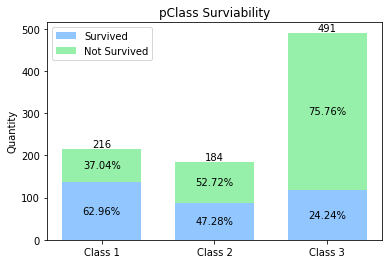

In [14]:
# Lets see if there is a difference in surviability given different classes

fig, ax = plt.subplots()

width = 0.7
ind = np.arange(3)    # the x locations for the groups

survivedClass = list(
    map(lambda x: sum(survivedSubset['Pclass'] == x), [1, 2, 3]))
notSurvivedClass = list(
    map(lambda x: sum(notSurvivedSubset['Pclass'] == x), [1, 2, 3]))

p1 = ax.bar(ind, survivedClass, width, label='Survived')
p2 = ax.bar(ind, notSurvivedClass, width,
            bottom=survivedClass, label='Not Survived')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Quantity')
ax.set_title('pClass Surviability')
ax.set_xticks(ind)
ax.set_xticklabels(('Class 1', 'Class 2', 'Class 3'))
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
# To create the percentage labels whe use list comprehension
# in a zipped list to compute the percentage of survivors
labelsSurvived = [
    round((perc[0]/sum(perc))*100, 2) for perc in zip(survivedClass, notSurvivedClass)]
# the percentage not survived is 100 - percentage survived
labelsNotSurvived = list(map(lambda x: f'{100 - x:.2f}%', labelsSurvived))
# converts to string
labelsSurvived = list(map(lambda x: f'{x}%', labelsSurvived))

ax.bar_label(p1, labels=labelsSurvived, label_type='center')
ax.bar_label(p2, labels=labelsNotSurvived, label_type='center')
ax.bar_label(p2)

plt.show()


 # Feature Engineering + DataVis
 By combining feature engineering to datavis we can see if different age groups have different survival rates.
 We compute the age group by doing an integer division of age by 10, this way we categorize 0-9 years passenger in group 0, 10-19 years in group 1, and so on.

 Then we use the **groupby** function in pandas (similar to the *SQL* groupby) and we aggregate values with the np.mean function;

In [15]:
datasetAges = dataset.dropna(axis=0, subset=['Age'])
datasetAges = datasetAges.assign(AgeGroup=datasetAges['Age'].apply(
    lambda x: x // 10 if x // 10 <= 6 else 6))
# There is a trick here, since Survived is a boolean attribute
# the Survived mean is the same as Rate of Survival (do the math smarty pants!)
ageGroup = datasetAges.groupby(['AgeGroup']).aggregate([np.mean, np.var])



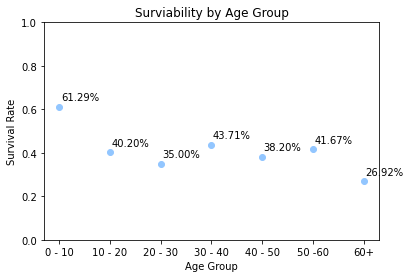

In [16]:

fig, ax = plt.subplots()
survivedRatio = ageGroup['Survived']['mean'].values
ax.scatter(ageGroup.index.values,
           survivedRatio)
ax.set_xticks(ageGroup.index.values)

ax.set_title('Surviability by Age Group')
ax.set_ylim((0, 1))
ax.set_ylabel('Survival Rate')
ax.set_xlabel('Age Group')

ax.set_xticklabels(['0 - 10', '10 - 20', '20 - 30',
                   '30 - 40', '40 - 50', '50 -60', '60+'])
for i in range(len(survivedRatio)):
    xyAnnotation = list(zip(ageGroup.index.values, survivedRatio))
# The magic number 0.03 serves as a offset so the annotation wont
# be in the same place of the dot in the graph
    xyAnnotationPlace = list(
        map(lambda x: (x[0]+0.03, x[1]+0.03), xyAnnotation))
    ax.annotate(f'{survivedRatio[i]*100:.2f}%',
                xy=xyAnnotation[i],
                xytext=xyAnnotationPlace[i])
# (ageGroup['Survived']['mean'].values)

fig.show()
